In [31]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import GradientDescentExercise as grd

# Zadanie 1 
##### WSI-24L-G104
Celem zadanie jest implementacja metody gradientu prostego dla dwóch funkcji:
- Funkcja Himmelblau:
    $$ f(x,y)=(x^2+y-11)^2+(x+y^2-7)^2 $$ 
- Funckcja Ackleya w wersji dwuwymiarowej:
    $$ f(x,y) = -20\exp(-0.2\sqrt{0.5(x^2+y^2)})-\exp(0.5(\cos2\pi x+\cos2\pi y))+20+e $$


## Opis działania metody
Metoda gradientu prostego polega na znalezieniu, w iteracyjny sposób, ekstremum lokalnego funkcji. W tym przypadku szukamy minimum dla funkcji dwóch zmiennych o postaci $z = f(x,y)$.
Gradient funkcji, $\nabla g(\mathbf{x_P})$ wskazuje kierunek w którym funckja rośnie najszybciej względem punktu $\mathbf{x_P}$, wynika więc, że w przeciwnym kierunku funckja będzie malała najszybciej. Możemy, więc przesunąć punkt $\mathbf{x_P}$  w kierunku najszybszego spadku i powtórzyć proces. Znaczenie na jeszcze długość czynionego kroku, jeśli okazałby się za duży, solver mógłby przeskoczyć za szukane ekstremum i zacząć uciekać do nieskończoności. Oczywiście krok nie powinien być za mały, ponieważ szukanie ekstremum zajęło by za długo. Wzór iteracyjny, wygląda następująco:
$$ \mathbf{x_t+1} = \mathbf{x_t} - \beta_t \nabla f(\mathbf{x_t}) $$
Oznacza to, że przed przystąpieniem do wyznaczenia ekstremum należy podać jakiś punkt początkowy \mathbf{x_0}, przy okazji można ograniczyć czas obliczeń podając odgórnie liczbę kroków do wykonania.

In [32]:
def gradient_descent(func, grad_func,start_pos,steps,beta):
    position = start_pos
    trace = [position]
    def calculate_new_position():
        grad_value = grad_func(position[0],position[1])
        e1 = position[0]-beta*grad_value[0]
        e2 = position[1]-beta*grad_value[1]
        return (e1,e2)
    for i in range(1,steps+1):
        position=calculate_new_position()
        trace.append(position)
    return trace


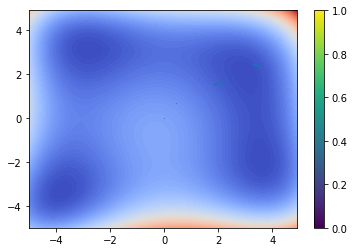

In [34]:
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5,5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = grd.himmelblau_function(X,Y)
r = gradient_descent(grd.himmelblau_function,grd.himmelblau_funnction_gradient,(0,0),100,0.03)
a = list(zip(*r))
plt.contourf(X,Y,Z,100,cmap="coolwarm")
plt.scatter(a[0],a[1],s=0.1)
plt.colorbar()
plt.show()